In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import torch
import numpy as np
import pandas as pd

In [19]:
PATH = 'gibbs-eta-NGprior-2encoders'
df = pd.read_csv('results/log-%s.txt' % PATH, sep='\t')
NUM_SAMPLES = 10

In [20]:
df

,EUBO,ELBO,ESS
0,-269.485,-692.773,1.124
1,-260.491,-588.295,1.152
2,-256.068,-524.616,1.170
3,-252.173,-485.461,1.190
4,-248.552,-455.153,1.202
5,-246.588,-436.841,1.217
6,-243.812,-421.518,1.229
7,-241.437,-409.635,1.247
8,-239.379,-402.254,1.251
9,-237.127,-394.622,1.262


In [11]:
def plot_results(df):
    fig = plt.figure(figsize=(15, 15))
    fig.tight_layout()
    ax1 = fig.add_subplot(3, 1, 1)
    ax2 = fig.add_subplot(3, 1, 2)
    ax3 = fig.add_subplot(3, 1, 3)
    ax1.plot(df['EUBO'].values, 'r', label='EUBOs')
    ax1.plot(df['ELBO'].values, 'b', label='ELBOs')

    ax1.tick_params(labelsize=18)
    ax2.set_yscale('log')
    ax2.plot(df['KLs_ex'].values, 'r', label='exclusive KL')
    ax2.plot(df['KLs_in'].values, 'b', label='inclusive KL')
    ax3.plot(df['ESS'].values / NUM_SAMPLES, 'm', label='ESS')
    ax1.set_ylim([-150, -90])
    ax1.legend()
    ax2.legend()
    ax3.legend()
    ax2.set_ylim([0, 6])
    ax2.tick_params(labelsize=18)
    ax3.tick_params(labelsize=18)
    ax3.set_ylim([0,1])
    plt.savefig('results/train_' + PATH + '.svg')

In [17]:
def plot_results(df):
    fig = plt.figure(figsize=(15, 15))
    fig.tight_layout()
    ax1 = fig.add_subplot(3, 1, 1)
    ax2 = fig.add_subplot(3, 1, 2)
    ax3 = fig.add_subplot(3, 1, 3)
    ax1.plot(df['EUBO'].values, 'r', label='EUBOs')
    ax1.plot(df['ELBO'].values, 'b', label='ELBOs')

    ax1.tick_params(labelsize=18)
#     ax2.set_yscale('log')
    ax2.plot(df['IWKLs_ex'].values, 'r', label='exclusive KL')
    ax2.plot(df['IWKLs_in'].values, 'b', label='inclusive KL')
    ax3.plot(df['ESS'].values / NUM_SAMPLES, 'm', label='ESS')
    ax1.set_ylim([-280, -190])
    ax1.legend()
    ax2.legend()
    ax3.legend()
    ax2.set_ylim([0, 6])
    ax2.tick_params(labelsize=18)
    ax3.tick_params(labelsize=18)
    ax3.set_ylim([0,1])
    plt.savefig('train_' + PATH + '.svg')

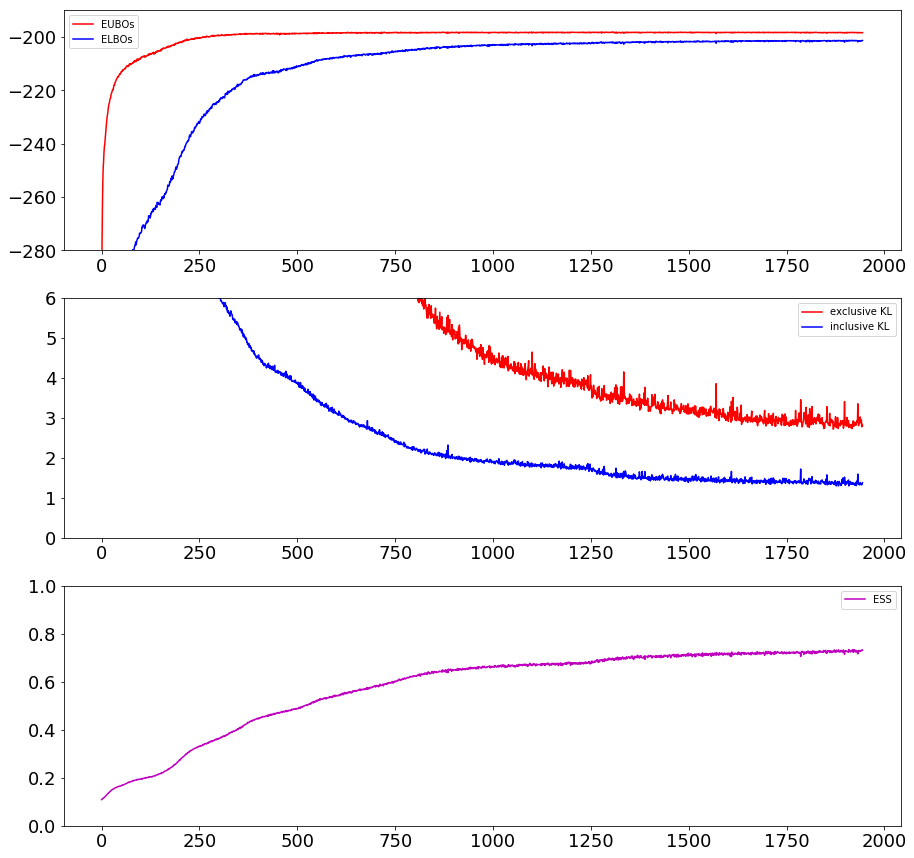

In [18]:
plot_results(df)